In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
sns.set()  

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
df = pd.read_csv("/Users/venkatesh/Documents/test_project_dir/Data Driven Investing/calculating_stock_returns/assignment/AAPL_stock_data.csv")

In [21]:
df.head()

,timestamp,open,high,low,close,volume
0,2025-01-03,243.36,244.18,241.8900,243.36,40244114
1,2025-01-02,248.93,249.10,241.8201,243.85,55740731
2,2024-12-31,252.44,253.28,249.4300,250.42,39480718
3,2024-12-30,252.23,253.50,250.7500,252.20,35557542
4,2024-12-27,257.83,258.70,253.0600,255.59,42355321


In [22]:
df = df[['timestamp', 'close']]

In [23]:
df.head()

,timestamp,close
0,2025-01-03,243.36
1,2025-01-02,243.85
2,2024-12-31,250.42
3,2024-12-30,252.20
4,2024-12-27,255.59


In [24]:
df.rename(columns={'timestamp' : 'date', 'close' : 'price_t'}, inplace=True)
df = df.sort_values(by='date')

In [25]:
df.head()

,date,price_t
1256,2020-01-07,298.39
1255,2020-01-08,303.19
1254,2020-01-09,309.63
1253,2020-01-10,310.33
1252,2020-01-13,316.96


In [26]:
df = df.reset_index(drop=True)
df['price_t-1'] = df['price_t'].shift(1)

In [27]:
df.head()

,date,price_t,price_t-1
0,2020-01-07,298.39,NaN
1,2020-01-08,303.19,298.39
2,2020-01-09,309.63,303.19
3,2020-01-10,310.33,309.63
4,2020-01-13,316.96,310.33


In [28]:
df['returns_manual'] = (df['price_t'] / df['price_t-1']) - 1

In [29]:
df.head()

,date,price_t,price_t-1,returns_manual
0,2020-01-07,298.39,NaN,NaN
1,2020-01-08,303.19,298.39,0.016086
2,2020-01-09,309.63,303.19,0.021241
3,2020-01-10,310.33,309.63,0.002261
4,2020-01-13,316.96,310.33,0.021364


In [30]:
df.tail()

,date,price_t,price_t-1,returns_manual
1252,2024-12-27,255.59,259.02,-0.013242
1253,2024-12-30,252.20,255.59,-0.013263
1254,2024-12-31,250.42,252.20,-0.007058
1255,2025-01-02,243.85,250.42,-0.026236
1256,2025-01-03,243.36,243.85,-0.002009


In [31]:
df['returns_pct_change_method'] = df['price_t'].pct_change(1)

In [32]:
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method
0,2020-01-07,298.39,NaN,NaN,NaN
1,2020-01-08,303.19,298.39,0.016086,0.016086
2,2020-01-09,309.63,303.19,0.021241,0.021241
3,2020-01-10,310.33,309.63,0.002261,0.002261
4,2020-01-13,316.96,310.33,0.021364,0.021364


In [33]:
df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1

In [34]:
df.head()

,date,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
0,2020-01-07,298.39,NaN,NaN,NaN,NaN
1,2020-01-08,303.19,298.39,0.016086,0.016086,0.016086
2,2020-01-09,309.63,303.19,0.021241,0.021241,0.021241
3,2020-01-10,310.33,309.63,0.002261,0.002261,0.002261
4,2020-01-13,316.96,310.33,0.021364,0.021364,0.021364


In [35]:
df.set_index('date', inplace=True)

In [36]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
date,,,,,
2020-01-07,298.39,NaN,NaN,NaN,NaN
2020-01-08,303.19,298.39,0.016086,0.016086,0.016086
2020-01-09,309.63,303.19,0.021241,0.021241,0.021241
2020-01-10,310.33,309.63,0.002261,0.002261,0.002261
2020-01-13,316.96,310.33,0.021364,0.021364,0.021364


<AxesSubplot:xlabel='date'>

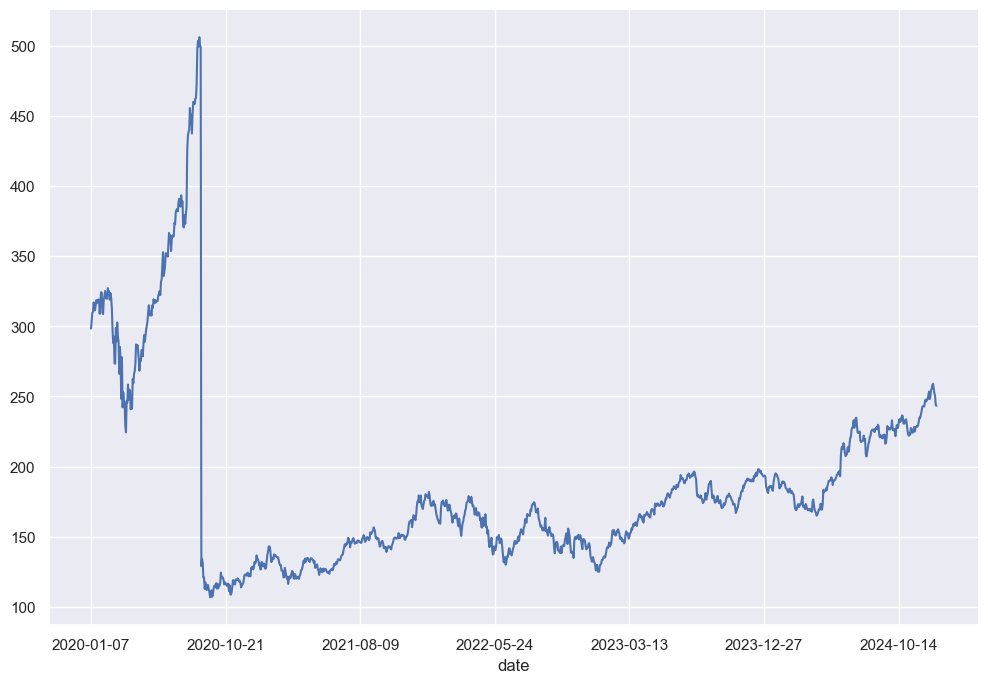

In [37]:
df['price_t'].plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

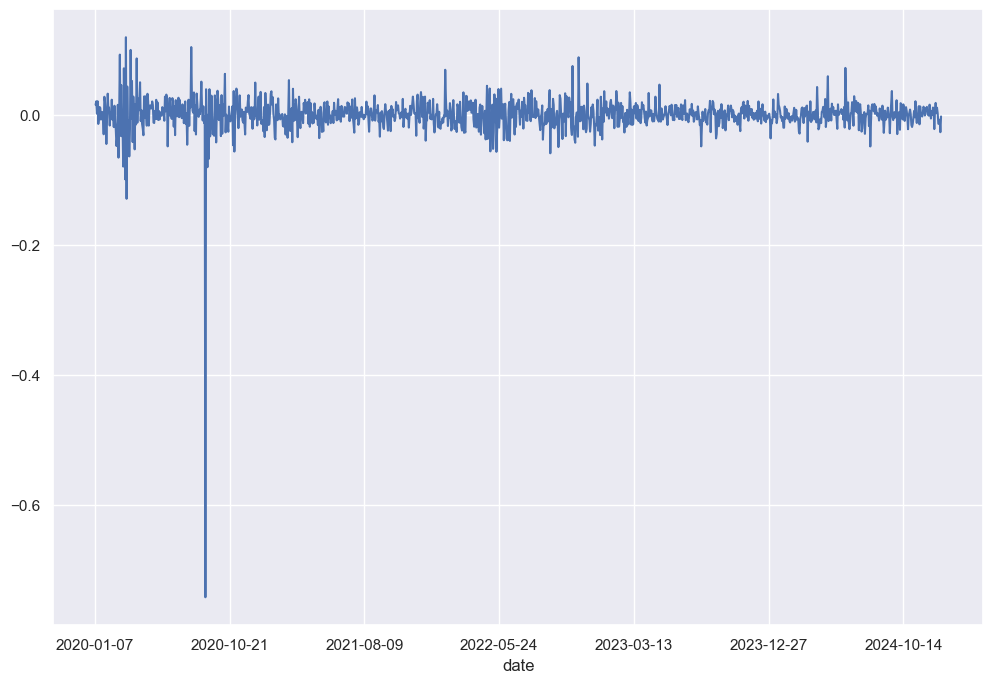

In [38]:
df['returns'].plot(figsize=(12, 8))